## 문제정의

후생노동청으로부터 2015년의 일본 인구 동태통계에 의하면 사망자의 약 60%가 생활습관병이 원인이 되고 있습니다.  
생활습관병은 불규칙한 식습관과 수면 패턴이 주로 원인이 되고 있으며, 대표적인 생활습관병으로는 고혈압, 당뇨병, 치매 등이 있습니다.  
특히, 세계적으로도 당뇨병 환자 수가 급증하고 있으며, 국제당뇨병 연합은 2045년에 환자 수가 6.3억 명으로 증가한다고 예상하고 있습니다.  
초기에 발견되지 않는다면 합병증인 뇌경색이나 심근경색증 등이 발생될 수 있습니다.   
따라서, 조기 발견이나 자가 진단을 통한 지속적인 관리가 필요합니다.


## 분석목적  
현재 의료 시스템으로는 병원에 직접 방문해서 여러 가지 검사를 통해 당뇨병을 진단받거나 경과를 지켜봐야 하기 때문에 시간이나 돈에 구애를 받게 됩니다.  
간단한 자가 진단을 통해 당뇨병의 위험 수치에 달하게 된다면 신속히 병에 대해 심각성을 인지하고 치료할 수 있습니다.   
모든 요인을 자가 진단 하기에는 어려우므로 당뇨병에 중요한 요인 몇 개만 진단해서 당뇨병에 의심이 되는 수치가 된다면 병원에 직접 방문해 더 자세히 진단을 받는 게 효율적이라고 생각됩니다.     
당뇨병에 있어서 중요한 요인을 찾기 위해서 다양한 분석 방법을 이용해서 각 요인에 대한 중요도를 평가합니다. 
중요하다고 생각되는 요인들을 모델을 이용해 성능을 평가해서 적합한지 판단합니다.    
중요한 요인만의 자가 진단을 통해 병원에 직접 방문하지 않고 당뇨병을 체크할 수 있게 되기 때문에 신속히 치료가 가능하고 당뇨병으로 인한 합병증도 예방 할 수 있습니다.  

## 분석계획
- 기초분석(t 검정, 상관분석), 주성분 분석, 클러스터 분석, 모델(SVM, 결정트리)을 이용한 feature의 중요도 평가를 통해 당뇨병에 있어서 중요한 feature가 무엇인지 분석하였습니다.  
- 당뇨병 환자들의 특성이나 특이점을 파악하기 위해서 정상인과 당뇨병 환자를 나누어서 분석을 진행 하였습니다. 예를 들면, 상관분석시 정상인에서는 높게 나온 feature 간의 상관성이 당뇨병 환자한테는 상관성이 높은지 안 높은지 비교해 feature 간의 상관성이 낮음으로 인해 당뇨병에 걸린 이유 중 하나 일 수도 있다는 이유로 파악할 수 있어 나누어서 분석을 진행하게 되었습니다. 
- 최종적으로 선택한 feature 기준으로 예측 모델 정확도를 통해 제안된 feature만으로도 타당한지를 확인하였습니다

## 그림1. 사망원인 - 생활습관병

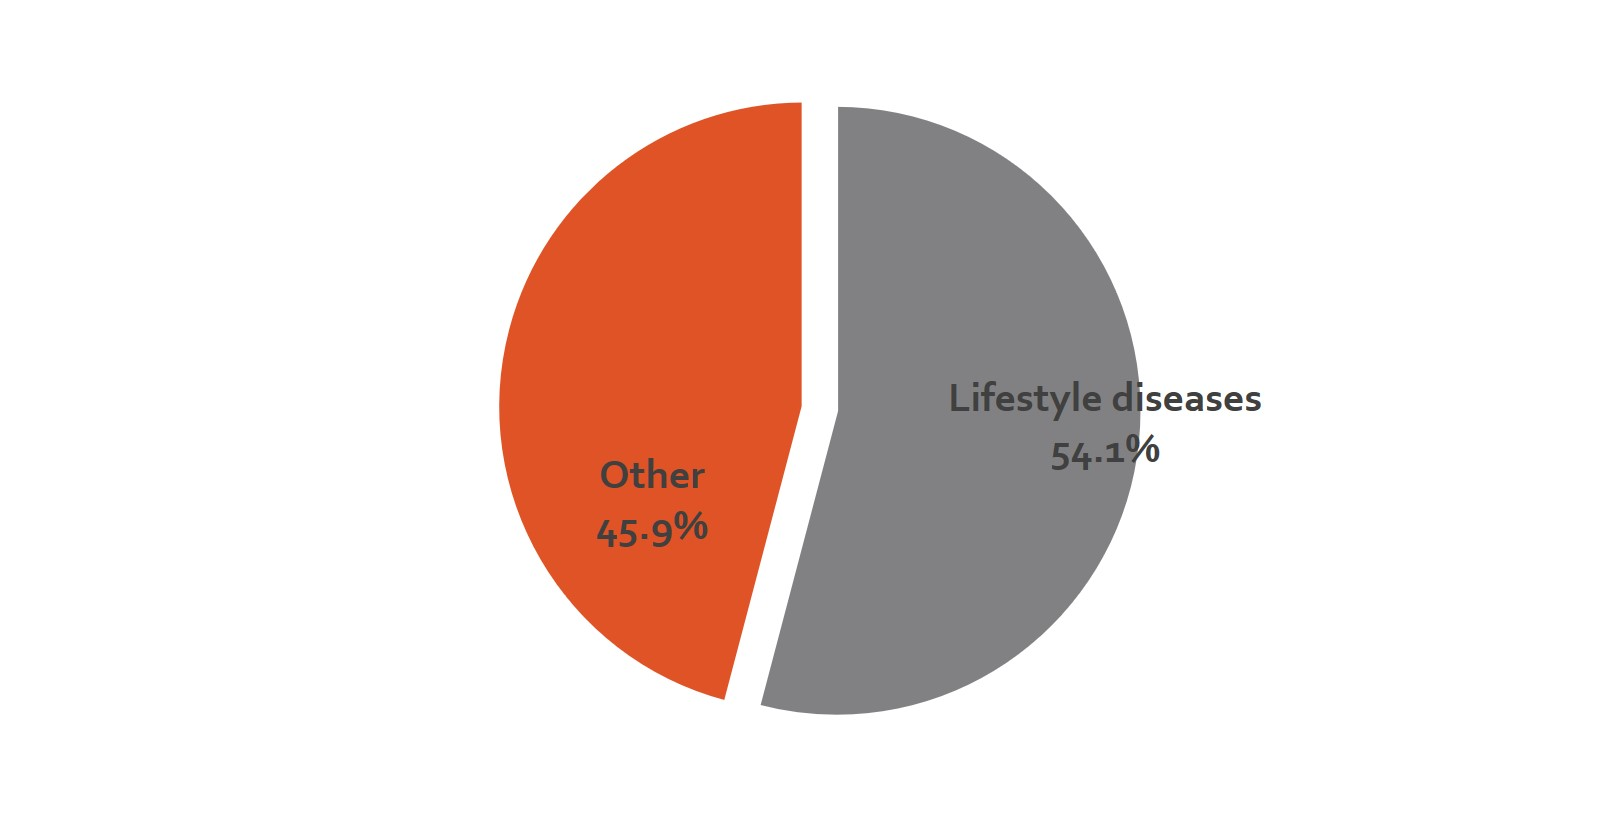

In [2]:
from IPython.display import Image
Image("data/related_disease.JPG")

Fig.1：The demographic statistics of Japan, 2015   
(source : Demographic Statistics, Ministry of Health, 2015  

# 데이터 설명

일반 정상인들과의 결과를 비교하면 당뇨병의 특성을 알 수 있어 정상인과 당뇨병 환자로 분류가 되어 있는 Pima Indians의 데이터를 사용하게 되었습니다.  

#### Pima Indian 데이터 
- Kaggle 오픈 데이터셋
- 데이터 대상: 21살 이상의 여성
- 데이터 개수: 정상인 500명, 당뇨병 환자 268명 총 768명
- 데이터 항목: 임신 횟수, 글루코스, 혈압, 피부 두께, 인슐린, BMI, 당뇨병 유전지수, 연령으로 총 8개의 피쳐(feature)로 이루어져 있는 진단 데이터입니다. 


# 데이터 가져오기

In [1]:
import pandas as pd

df = pd.read_excel("data/pima_data.xlsx")

print("Data Size:",len(df))

df.describe()

Data Size: 768


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 데이터 전처리

특정하게 크거나 작은 값이 포함된 데이터는 제대로 된 결과가 나오지 않을 수도 있기 때문에 1-class SVM을 이용해서 10퍼센트(nu = 0.9)의 이상치를 제거하였습니다.  

In [ ]:
# Matlab R2019a를 이용해서 정상인과 당뇨병환자를 나누어서 이상치를 검출하였습니다. 

In [2]:
X = df[df.columns[:-1]]
y = df['Outcome']

In [3]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [4]:
import numpy as np
from sklearn.svm import OneClassSVM

clf = OneClassSVM(nu=0.092, max_iter=100000).fit(X_scaled)
outlier = clf.predict(X_scaled)
pd.Series(clf.predict(X_scaled)).value_counts()

 1    695
-1     73
dtype: int64

73건의 이상치 데이터를 제거하여 정상인 452명, 당뇨병환자 243명으로 데이터 분석을 진행합니다.

In [5]:
df['outlier'] = outlier

In [6]:
# outlier가 아닌 데이터만 필터해서 가져온다
normal_df = df.loc[df['outlier'] == 1]

In [7]:
normal_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,outlier
0,1,85,66,29,0,26.6,0.351,31,0,1
1,1,89,66,23,94,28.1,0.167,21,0,1
2,5,116,74,0,0,25.6,0.201,30,0,1
4,4,110,92,0,0,37.6,0.191,30,0,1
6,1,103,30,38,83,43.3,0.183,33,0,1


feature를 X로, target 변수는 y로 나눔

In [8]:
#전체
X = normal_df[df.columns[:-2]]
y = normal_df['Outcome']

전처리된 데이터를 전체, 정상인만, 당뇨병환자만의 3가지로 분류할 수 있습니다.

In [9]:
normal_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'outlier'],
      dtype='object')

In [10]:
health_df = normal_df.loc[normal_df['Outcome'] == 0]
health_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,outlier
0,1,85,66,29,0,26.6,0.351,31,0,1
1,1,89,66,23,94,28.1,0.167,21,0,1
2,5,116,74,0,0,25.6,0.201,30,0,1
4,4,110,92,0,0,37.6,0.191,30,0,1
6,1,103,30,38,83,43.3,0.183,33,0,1


In [11]:
diabetes_df = normal_df.loc[normal_df['Outcome'] == 1]
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,outlier
500,6,148,72,35,0,33.6,0.627,50,1,1
501,8,183,64,0,0,23.3,0.672,32,1,1
503,3,78,50,32,88,31.0,0.248,26,1,1
506,10,168,74,0,0,38.0,0.537,34,1,1
508,5,166,72,19,175,25.8,0.587,51,1,1


정상인 데이터

In [12]:
X0 = health_df[health_df.columns[:-2]]
y0 = health_df['Outcome']

당뇨병 환자

In [13]:
X1 = diabetes_df[diabetes_df.columns[:-2]]
y1 = diabetes_df['Outcome']

각 feature의 데이터 범위가 다르기 때문에,  
데이터를 모델링하기 전 X를 StandardScaler를 통해 정규화(Normalization) 해줍니다

In [14]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [15]:
X_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.880334,-1.161853,-0.236630,0.556001,-0.764427,-0.818295,-0.345798,-0.160856
1,-0.880334,-1.028422,-0.236630,0.163828,0.184462,-0.590256,-1.006487,-1.052361
2,0.369579,-0.127767,0.247248,-1.339499,-0.764427,-0.970321,-0.884404,-0.250006
3,0.057100,-0.327912,1.335973,-1.339499,-0.764427,0.853994,-0.920311,-0.250006
4,-0.880334,-0.561416,-2.414080,1.144259,0.073422,1.720544,-0.949036,0.017445


# 기초분석

## T-test
두 집단 간의 평균이 통계적으로 유의미한 차이를 보고 있는지의 여부를 검증할 수 있습니다.  
  
해당 피쳐가 정상인과 당뇨병 환자 간에 평균적인 차이가 있는지를 보기 위해서 t-test를 사용하였습니다.

정상인과 당뇨병환자를 나눠 t-test를 진행하였습니다.

In [16]:
X_columns = normal_df.columns[:-2]

당뇨병환자

In [17]:
df1 = normal_df.loc[normal_df['Outcome']==1,X_columns]

정상인

In [18]:
df0 = normal_df.loc[normal_df['Outcome']==0,X_columns]

정상인과 당뇨병환자에 대한 피쳐의 평균값

In [19]:
mean_df = pd.concat([df0.mean(),df1.mean()],axis = 1)
mean_df.columns = ['normal','diabetes']

print(mean_df)

                              normal    diabetes
Pregnancies                 3.310195    4.816239
Glucose                   109.596529  139.991453
BloodPressure              68.689805   72.320513
SkinThickness              20.008677   21.448718
Insulin                    68.470716   90.021368
BMI                        30.638395   34.630769
DiabetesPedigreeFunction    0.408514    0.523722
Age                        30.739696   36.871795


#### 두 집단 간의 피쳐 평균 차이를 봤을 때 특히 glucose가 정상인과 당뇨병 환자 간의 확연히 차이가 있는 것을 볼 수 있습니다.

### t-test검정 전 등분산성 검정

등분산 검정할 때, LeveneResult의 결과에서 p-value가 0.05 이상이면 등분산성을 갖는 것으로 판단됩니다. 

등분산성 검정 결과, 2개의 feature(BloodPressure, Age)가 0.05이상의 값을 가지므로 등분산성을 가지는 것으로 판단 할 수 있습니다.

In [20]:
from scipy import stats
for col in X_columns:
    print(col)
    print(stats.levene(X0[col], X1[col]))
    print(stats.fligner(X0[col], X1[col]))
    print(stats.bartlett(X0[col], X1[col]))

Pregnancies
LeveneResult(statistic=13.316511450281993, pvalue=0.0002828492466375095)
FlignerResult(statistic=17.12421313852549, pvalue=3.501307809620218e-05)
BartlettResult(statistic=8.765328949612895, pvalue=0.0030701069959033545)
Glucose
LeveneResult(statistic=22.284933972629545, pvalue=2.8450096804015523e-06)
FlignerResult(statistic=24.01233058129909, pvalue=9.572072168753504e-07)
BartlettResult(statistic=16.20923544207228, pvalue=5.6716936949399445e-05)
BloodPressure
LeveneResult(statistic=0.478736718943976, pvalue=0.4892268346715323)
FlignerResult(statistic=0.06696592677596892, pvalue=0.7958067218827903)
BartlettResult(statistic=6.772285401415816, pvalue=0.009258420156886929)
SkinThickness
LeveneResult(statistic=9.760412342200766, pvalue=0.0018574457900677245)
FlignerResult(statistic=27.412813166150734, pvalue=1.6433875208387445e-07)
BartlettResult(statistic=6.457024913020159, pvalue=0.011051452707640864)
Insulin
LeveneResult(statistic=13.160198502621894, pvalue=0.0003069642887648

#### 두 집단의 평균 차이가 통계적으로 유의미한지 t-검증  
p_value < 0.05이면, 두 집단 간의 평균 차이는 통계적으로 유의미합니다

In [21]:
import scipy.stats

result = scipy.stats.ttest_ind(X0, X1, equal_var=True)
pd.DataFrame(result.pvalue,index=X_columns,columns=['p_value'])

,p_value
Pregnancies,3.087521e-09
Glucose,3.543645e-41
BloodPressure,6.174074e-03
SkinThickness,2.415530e-01
Insulin,6.675954e-03
BMI,1.252090e-14
DiabetesPedigreeFunction,2.050038e-07
Age,4.635744e-12


In [22]:
pd.DataFrame(result.statistic,index=X_columns,columns=['t_value'])

,t_value
Pregnancies,-6.004995
Glucose,-14.370542
BloodPressure,-2.746810
SkinThickness,-1.172117
Insulin,-2.720793
BMI,-7.881935
DiabetesPedigreeFunction,-5.247649
Age,-7.040004


#### 검증 결과,  
  
#### SkinThickness의 p_value는 0.05보다 크므로 해당 피쳐에 대해서는 두 집단(정상인과 당뇨병환자)의 평균 차이는 통계적으로 유의미하지 않습니다.

## 상관분석

2개의 피쳐 간의 상관계수를 통해 상관관계를 알 수 있습니다.

정상인과 당뇨병 환자를 나누어서 상관계수의 차이점을 비교하고, 당뇨병 환자에게는 어떤 피쳐 간의 상관관계가 높은지도 파악 할 수 있습니다.

### 정상인들을 대상으로 한 상관분석

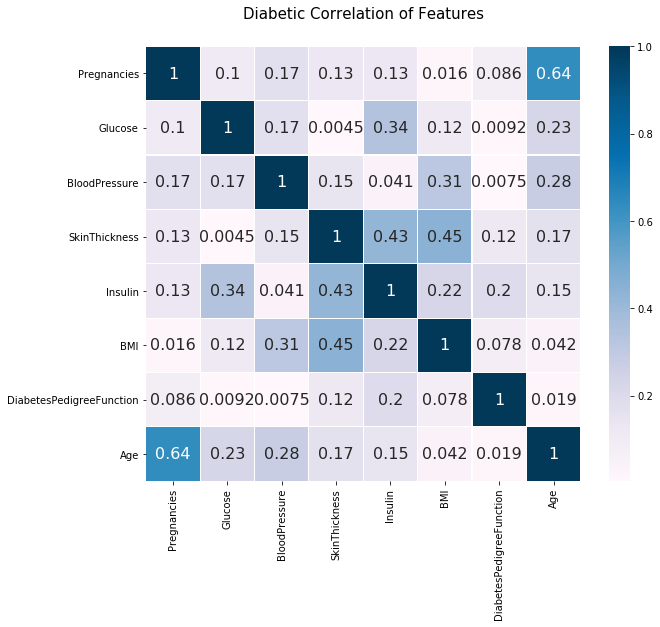

In [23]:
import matplotlib.pyplot as plt 
import seaborn as sns

corr_df = X0.astype(float).corr().abs()
colormap = plt.cm.PuBu 
plt.figure(figsize=(10, 8)) 
plt.title("Diabetic Correlation of Features", y = 1.05, size = 15) 
sns.heatmap(corr_df, linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})


#### 정상인에 대한 상관분석 결과에 의하면,  
#### Pregnancies & Age, BMI & SkinThickness, Insulin & SkinThickness가 서로 밀접하게 관련되어 있다고 볼 수 있습니다.  

### 당뇨병 환자들을 대상으로 한 상관분석

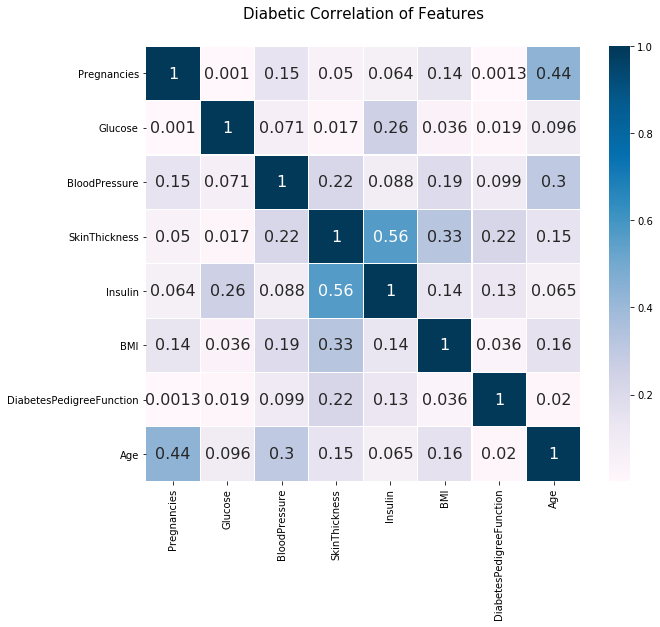

In [24]:
import matplotlib.pyplot as plt 
import seaborn as sns

corr_df = X1.astype(float).corr().abs()
colormap = plt.cm.PuBu 
plt.figure(figsize=(10, 8)) 
plt.title("Diabetic Correlation of Features", y = 1.05, size = 15) 
sns.heatmap(corr_df, linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})


#### 당뇨병 환자에 대한 상관분석 결과에 의하면,  
#### Pregnancies & Age, Insulin & SkinThickness가 서로 밀접하게 관련되어 있다고 볼 수 있으며,
#### 정상인과의 차이점으로는 Insulin & SkinThickness의 상관성이 더 높아졌고, BMI & SkinThickness와의 상관성은 낮아진 것을 알 수 있습니다. 정상인들의 특성으로는 체형이 통통한 사람에게는 피부 두께도 두꺼울 수 있다고 생각됩니다.
#### 반면에, 당뇨병 환자들은 피부 두께에 땨라 인슐린 투하량이 달라지며 체형이 마른 환자에게도 피부 두께가 두꺼울 가능성도 클 수 있습니다.

## 그래피컬라소(Graphical Lasso)
구조분석으로 이용되는 그래피컬라소 방법을 사용해서 피쳐 간의 상관관계를 그래프화 함으로써 대상에 대한 피쳐 간의 상관관계를 알 수 있고 대상들을 비교하기 쉽습니다.  
정상인과 당뇨병 환자로 나누어서 각 피쳐에 따른 상관관계의 차이를 알 수 있고, 당뇨병 환자들에 대한 해당 피쳐의 특성에 대해서 분석 할 수 있습니다.

#### 당뇨병과 정상인 사이의 피쳐 간의 관계 파악을 위해 그래피컬라소로 시각화 함  

그래피컬라소란,  
다변량정규분포의 복잡한 구조인 파라미터를 그래프 구조로서 변형시켜 이상 감지를 추출할 수 있는 방법 중의 하나로  
두 집단 간의 이상 감지와 피쳐 간의 의존관계를 효율적으로 분석할 수 있는 게 가장 큰 장점입니다.  
또한, 그래프 구조에서의 피쳐 간의 변화를 확인하고 각 피쳐에 대한 변화 값도 비교할 수 있습니다.  
(변수 간의 관계성을 그래프로 표시할 수 있어 변수 간의 특징이나 차이점을 쉽게 알 수 있습니다.  
또, 각 항목 간의 상관이 있으면 그래프상에 선을 표시해서 변수 간의 상관성을 확인 할 수 있습니다.) 

#### 그래피컬라소는 MATLAB으로 진행하였으며, 아래 MATLAB코드를 참고

clear;
load ('diabetes.mat');  
%X=AA;  
%[Y]=X(:,end);  
tic  
%%  
%[Y] = SVMModel_c1.predictFcn(X(:,1:end-1));  
%%  
%x_1 = X(Y==0, 1:end-1);  
%x_2 = X(Y==1, 1:end-1);  
rho = 0.2;  
i = []; % 항목  
y_1(:,i)=[];  
y_2(:,i)=[];  
%==============================================  
[LambdaO_1, S_1] = graphic_lasso(y_1, rho);%정상인  
[LambdaO_2, S_2] = graphic_lasso(y_2, rho);%당뇨병 환자  
%% ==============================================
% close all;  
epss = 0.00001; %lambda 설정값  
glasso_graph(LambdaO_1, epss);  
glasso_graph(LambdaO_2, epss);  
%% ==============================================  
Lambda_1 = LambdaO_1;  
% Lambda_1(abs(Lambda_1)<epss) = 0;  
Lambda_2 = LambdaO_2;  
% Lambda_2(abs(Lambda_2)<epss) = 0;  
%==============================================  
[a_12] = [];  
[LSL_1] = Lambda_1*S_1*Lambda_1;  
[LSL_2] = Lambda_2*S_1*Lambda_2;  
for i = 1:size(Lambda_1,1)  
   a_12(i,1) = 1/2 * log(Lambda_1(i,i)/Lambda_2(i,i)) ...  
            -1/2 * (LSL_1(i,i)/Lambda_1(i,i) - LSL_2(i,i)/Lambda_2(i,i));  
end  
%==============================================  
[a_21] = [];  
[LSL_1] = Lambda_2*S_2*Lambda_2;  
[LSL_2] = Lambda_1*S_2*Lambda_1;  
for i = 1:size(Lambda_1,1)  
   a_21(i,1) = 1/2 * log(Lambda_2(i,i)/Lambda_1(i,i)) ...  
            -1/2 * (LSL_1(i,i)/Lambda_2(i,i) - LSL_2(i,i)/Lambda_1(i,i));  
end  
% toc  
[degree_abnormal] = max([a_12 a_21], [], 2);%변화도  

Pima Indian 중에서 정상인과 당뇨병 환자를 구분해서 그래피컬라소로 나타내어    
당뇨병 환자에 대한 피쳐 간의 관계를 파악하고 정상인과의 다른 점을 비교할 수 있습니다.    
각 피쳐에 대해 정상인에서 당뇨병 환자로 변화하는 것을 수치화 해서 어떤 피쳐가 변화도가 큰지 파악하였습니다.   .  

### 정상인결과

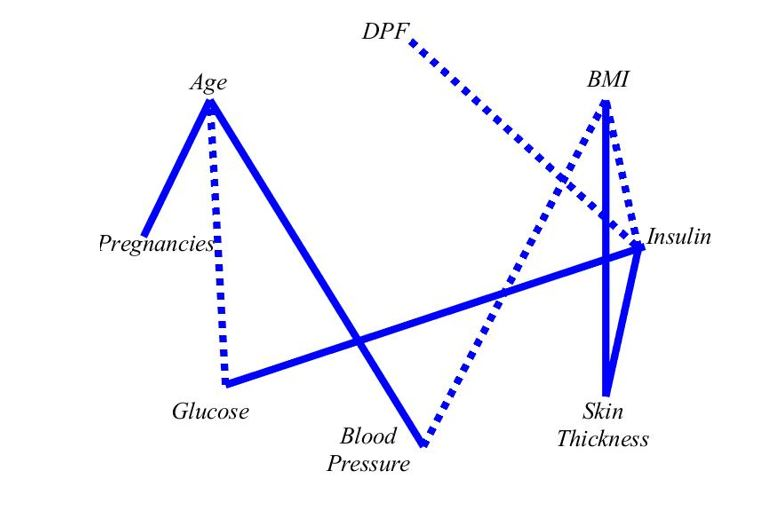

In [8]:
from IPython.display import Image  
Image("data/healthy_GL.JPG")  

### 당뇨병  환자 결과

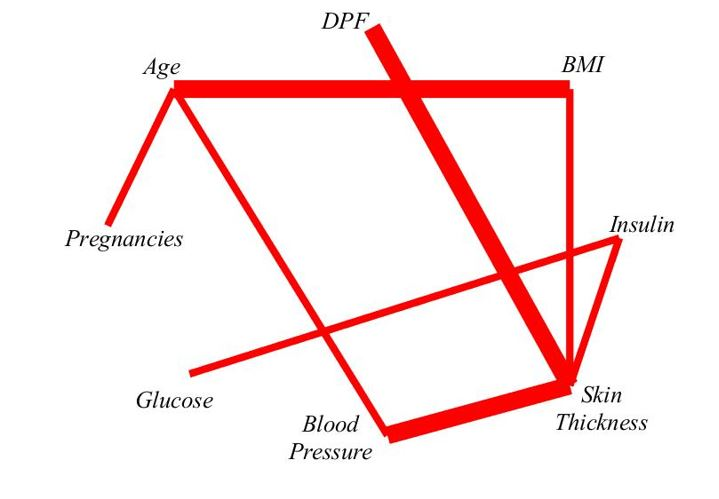

In [9]:
from IPython.display import Image  
Image("data/diabetes_GL.JPG")  

#### 정상인과 당뇨병 환자를 나누어서 두 피쳐 간의 상관관계가 존재하면 선으로 나타내서 두 피쳐 간의 상관관계를 보기 쉽습니다.

#### 정상인과 당뇨병환자의 두 그래프를 비교하면,    
#### 정상인 그래프에서의 점선은 피쳐 간의 관계의 상관성이 낮음을 보여주며  
#### 당뇨병 환자 그래프에서 정상인 그래프와 비교했을 때, 새로운 선은 피쳐 간의 관계의 상관성이 정상인과 비교했을 때 더 높은 관계로  
#### 두꺼운 선으로 표시되었습니다.  
  
#### 두꺼운 선을 봤을 때, 정상인과 비교하여 당뇨병환자한테 SkinThickness & BloodPressure, SkinThickness & DiabetesPedigreeFunction, BMI & Age의 상관성이 높은 것을 알 수 있습니다. 

#### 상관성이 높아지는 관계로 특히 당뇨병환자에게 피부 두께와의 관계들의 상관성이 높아져 있기 때문에 피부 두께와의 관계가 중요하다고 생각됩니다. t-test 결과에 의하면 skin thickness는 유의미하지 않는 feature라고 판단 되었지만 다른 요인 간의 상관성은 높기 때문에 피쳐 간의 관계는 깊다고 생각됩니다.

#### 특히, BMI와 연령은 정상인에서 당뇨병환자로 변화되는 수치가 8개의 피쳐 중 가장 높게 나왔습니다. 그만큼 두 집단 간의 차이가 크다는 것을 알 수 있습니다.





## 요인분석

요인 분석을 이용해서 요인의 차원 축소에 따른 각 주성분에 차지되는 요인들의 비율에 대해서 알 수 있습니다.   
요인분석은 상관관계를 이용해서 요인들을 비슷한 성격들로 묶어서 새로운 주성분으로 만들어내기 때문에 요인들의 특성을 알 수 있습니다.  
비슷한 성격들로 묶이는 특성 때문에 크게 어떻게 나눌 수 있는지에 대해서 분석할 수 있습니다.   

### 당뇨병 환자에 대한 요인분석

### KMO와 Bartlett의 검정

#### Bartlett 검정
Bartlett 검정은 요인분석 모형의 적합성 여부를 나타냅니다  
요인분석 모형으로서 적합한지 아닌지는 유의확률로서 파악하게 되며,  
귀무가설은 "상관관계 행렬이 단위 행렬이다"이며 귀무가설이 기각되어야지만 요인분석 모델을 사용할 수 있습니다.  
예를 들어 유의확률이 0.05보다 작으면 귀무가설을 기각할 수 있으며, 요인분석이 적절하다라고 할 수 있습니다  

In [29]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value = calculate_bartlett_sphericity(df1)
chi_square_value, p_value

(274.53020379523343, 2.650799977945653e-42)

#### Bartlett 검정의 결과로 p_value가 0.05보다 작아 귀무가설을 기각할 수 있으며, 요인분석이 적절하다고 할 수 있습니다.

#### KMO 검정
KMO는 변수들 간의 상관관계가 다른 변수에 의해 잘 설명되는지 정도를 나타내는 값으로,     
이 값이 작으면 요인분석을 위한 변수들의 선정이 적절치 못했다는 의미로 볼 수 있습니다.    



일반적으로 KMO 값이 0.9 이상이면 상당히 좋고,   
KMO 값이 일반적으로 0.5 이상이면 준비된 데이터가 요인분석으로 분석하기에 적절하다고 판단할 수 있습니다.  

KMO검정 참고문헌 : A Study on the Travel Characteristics of Administrative Unit by Factor and Cluster Analysis: Focused on Incheon Metropolitan City http://journal.kits.or.kr/journal/article.php?code=41664   

In [31]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df1)
kmo_model
# Value of KMO less than 0.6 is considered inadequate.

0.5224646419833954

#### KMO 값이 0.52로 요인분석을 위한 변수 선정이 적절하다고 판단되기 때문에 요인분석을 진행하였습니다.

#### 요인분석 
요인 분석 시 초기값 설정에 따라 계산 속도가 많이 영향을 받기 때문에 초기값을 제어할 수 있는 주성분 분석(principal) 방법을 선택하였으며,  
요인행렬의 열을 단순화시키는 방식으로 각 요인 간의 각도를 90도 유지하면서 회전시키는 직각 회전으로 varimax 방법을 이용하면 변수와 요인 간의 관계가 명확해져 해석하기 쉽기 때문에 해당 방법을 이용하여 요인분석을 진행하였습니다.

In [32]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=3, method="principal", rotation="varimax")
fa.fit(df1)

FactorAnalyzer(method='principal', rotation='varimax', rotation_kwargs={})

In [33]:
fa.loadings_

array([[-0.09207064,  0.74748219, -0.04712589],
       [-0.14931909,  0.0824223 ,  0.87098272],
       [ 0.45756808,  0.57561917,  0.02178662],
       [ 0.82344966, -0.06767844,  0.21347766],
       [ 0.52396147, -0.07952157,  0.64329258],
       [ 0.58179765, -0.16241091,  0.01452436],
       [ 0.48541392,  0.09158835, -0.15801379],
       [-0.15223407,  0.83357483,  0.07756885]])

In [34]:
efa_result= pd.DataFrame(fa.loadings_, index=df1.columns)
efa_result

,0,1,2
Pregnancies,-0.092071,0.747482,-0.047126
Glucose,-0.149319,0.082422,0.870983
BloodPressure,0.457568,0.575619,0.021787
SkinThickness,0.823450,-0.067678,0.213478
Insulin,0.523961,-0.079522,0.643293
BMI,0.581798,-0.162411,0.014524
DiabetesPedigreeFunction,0.485414,0.091588,-0.158014
Age,-0.152234,0.833575,0.077569


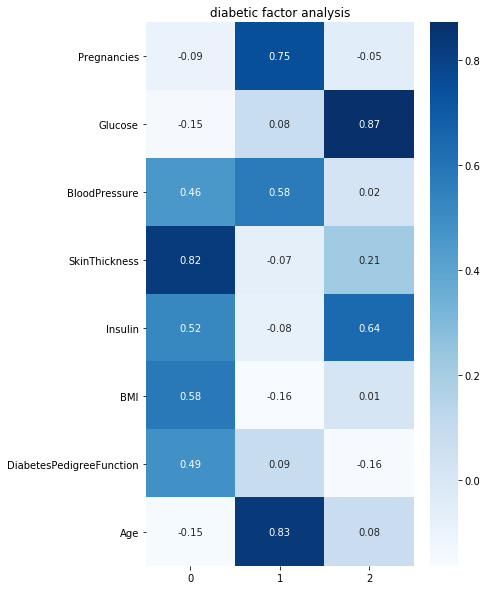

In [35]:
import seaborn as sns
plt.figure(figsize=(6,10))
plt.title('diabetic factor analysis' )
sns.heatmap(efa_result,cmap="Blues",  annot=True, fmt='.2f')

#### 위 히트맵에서 당뇨병 환자들 대상으로 각 성분마다 차지하고 있는 피쳐에 대해서 볼 수 있으며,  
#### 제1성분 SkinThickness, BMI, DiabetesPedigreeFunction   
#### 제2성분 Age, Pregnancies, BloodPressure  
#### 제3성분 Glucose, Insulin 으로 피쳐가 나눠질 수 있습니다.    
####   
#### 그래피컬라소와의 결과를 참고해 각 성분을 하나의 요인으로 크게 나누자면,  
#### 제1성분은 피부 두께로 관련된 요인,  
#### 제2성분은 연령에 관련된 요인,  
#### 제3성분은 혈당에 관련된 요인으로 볼 수 있습니다.

### 정상인에 대한 요인분석

#### Bartlett 검정

In [36]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value = calculate_bartlett_sphericity(df0)
chi_square_value, p_value

(699.2316550318192, 2.8352160063295805e-129)

#### Bartlett 검정의 결과로 p_value가 0.05보다 작아 귀무가설을 기각할 수 있으며, 요인분석이 적절하다고 할 수 있습니다

#### KMO검정

In [37]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df0)
kmo_model

0.5616251134778683

#### KMO 값이 0.52로 요인분석을 위한 변수 선정이 적절하다고 판단되기 때문에 요인분석을 진행하였습니다.

#### 요인분석

In [38]:
from factor_analyzer import FactorAnalyzer
fa1 = FactorAnalyzer(n_factors=3, method="principal", rotation="varimax")
fa1.fit(df0)

FactorAnalyzer(method='principal', rotation='varimax', rotation_kwargs={})

In [39]:
fa1.loadings_

array([[-0.00211984,  0.8100154 , -0.11289479],
       [-0.07301161,  0.40381   ,  0.74874779],
       [ 0.57795236,  0.44945778, -0.03221167],
       [ 0.73925609, -0.26949776,  0.25363312],
       [ 0.26144985, -0.16919382,  0.80663816],
       [ 0.82180576,  0.05951653,  0.10083924],
       [ 0.07111867, -0.14009047,  0.36522808],
       [ 0.00348463,  0.87923496, -0.02378952]])

In [40]:
efa1_result= pd.DataFrame(fa1.loadings_, index=df0.columns)
efa1_result

,0,1,2
Pregnancies,-0.002120,0.810015,-0.112895
Glucose,-0.073012,0.403810,0.748748
BloodPressure,0.577952,0.449458,-0.032212
SkinThickness,0.739256,-0.269498,0.253633
Insulin,0.261450,-0.169194,0.806638
BMI,0.821806,0.059517,0.100839
DiabetesPedigreeFunction,0.071119,-0.140090,0.365228
Age,0.003485,0.879235,-0.023790


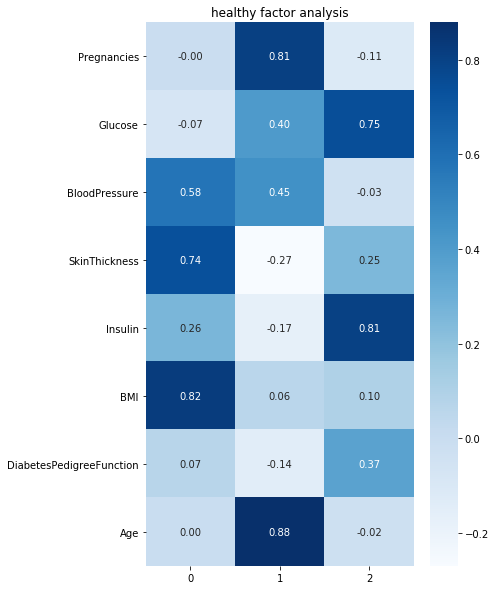

In [40]:
plt.figure(figsize=(6,10))
plt.title('healthy factor analysis')
sns.heatmap(efa1_result, cmap="Blues", annot=True, fmt='.2f')

#### 정상인들 대상으로 각 성분마다 차지하고 있는 피쳐에 대해서 볼 수 있으며,  
#### 제1성분 SkinThickness, BMI, BloodPressure  
#### 제2성분 age, Pregnancies  
#### 제3성분 Glucose, Insulin, DiabetesPedigreeFunction 으로 피쳐가 나눠질 수 있습니다.  
####   
#### 제1성분은 비만으로 관련된 요인,   
#### 제2성분은 연령에 관련된 요인,   
#### 제3성분은 인슐린에 관련된 요인으로 크게 나눌 수 있습니다.  
####  
##### 위 결과를 통해 당뇨병 환자와의 차이점으로는 당뇨병 환자 대상으로는 혈당에 관련된 요인으로 나뉘지만, 정상인은 인슐린에 관련된 요인들로 크게 나눠지는 점입니다.  
#### 두 집단 간의 차이점으로 봤을 때, 당뇨병이 특히 혈당과의 관련이 깊다고 볼 수도 있습니다.  

### 클러스터 분석
정상인과 당뇨병 환자에 대한 피쳐가 어떻게 군집이 이루어지는 지를 확인하고 비슷한 피쳐들을 크게 하나의 피쳐로 묶어서 설명할 수 있기 때문에 클러스터 분석을 이용하게 되었습니다.   
즉, 각각의 군집에 대해서 비슷한 성질을 가지고 있는 피쳐들을 알 수 있습니다.

클러스터 분석에서 크기가 비슷한 클러스터를 형성시키기 위해서 ward 법을 이용했습니다.  

#### 정상인들에 대한 클러스터 분석결과

In [55]:
clustering1_df = health_df[health_df.columns[:-2]].T

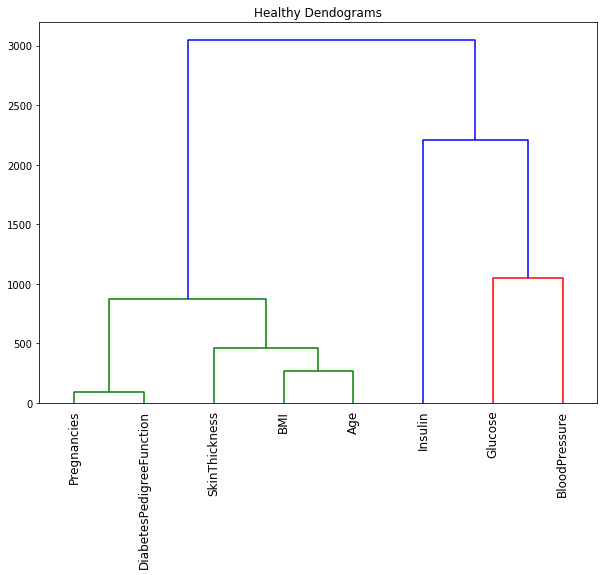

In [56]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Healthy Dendograms")
dend = shc.dendrogram(shc.linkage(clustering1_df, method='ward'),labels=clustering_df.index)
plt.xticks(rotation=90)
plt.show()

In [57]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clustering_result = cluster.fit_predict(clustering1_df)

In [58]:
den1_df = pd.DataFrame([clustering1_df.index.tolist(),clustering_result.tolist()]).T
den1_df.columns = ['feature_name','cluster']
den1_df.sort_values(by=['cluster'])

,feature_name,cluster
1,Glucose,0
2,BloodPressure,0
0,Pregnancies,1
3,SkinThickness,1
5,BMI,1
6,DiabetesPedigreeFunction,1
7,Age,1
4,Insulin,2


In [59]:
den1_df['feature_name'] = den1_df['feature_name'] + ", "

In [60]:
den1_df.groupby('cluster')['feature_name'].sum()

cluster
0                             Glucose, BloodPressure, 
1    Pregnancies, SkinThickness, BMI, DiabetesPedig...
2                                            Insulin, 
Name: feature_name, dtype: object

#### 정상인들에 대해 3개의 군집으로 나눈다면,  
#### 1군집 : Pregnancies, DiabetesPedigreeFunction, SkinThickness, BMI, Age  
#### 2군집 : Glucose, BloodPressure  
##### 3군집 : Insulin  군집화 되는 것을 볼 수 있습니다.
#### 보통 일반인들에게는 각 군집에 속해 있는 피쳐끼리 비슷한 성질을 가지고 있다는 것을 알 수 있고, 당뇨병 환자와의 클러스터분석 결과와 비교할 수 있습니다.

#### 당뇨병환자들에 대한 클러스터분석결과

In [49]:
clustering0_df = diabetes_df[diabetes_df.columns[:-2]].T

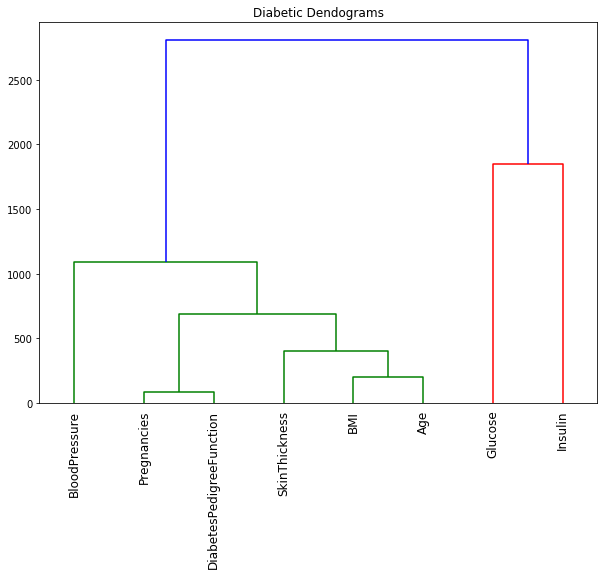

In [50]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Diabetic Dendograms")
dend = shc.dendrogram(shc.linkage(clustering0_df, method='ward'),labels=clustering_df.index)
plt.xticks(rotation=90)
plt.show()

In [51]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clustering_result = cluster.fit_predict(clustering0_df)

In [52]:
den0_df = pd.DataFrame([clustering0_df.index.tolist(),clustering_result.tolist()]).T
den0_df.columns = ['feature_name','cluster']
den0_df.sort_values(by=['cluster'])

,feature_name,cluster
0,Pregnancies,0
2,BloodPressure,0
3,SkinThickness,0
5,BMI,0
6,DiabetesPedigreeFunction,0
7,Age,0
4,Insulin,1
1,Glucose,2


In [53]:
den0_df['feature_name'] = den0_df['feature_name'] + ", "

In [54]:
den0_df.groupby('cluster')['feature_name'].sum()

cluster
0    Pregnancies, BloodPressure, SkinThickness, BMI...
1                                            Insulin, 
2                                            Glucose, 
Name: feature_name, dtype: object

#### 당뇨병환자들에 대해 3개의 군집으로 나눈다면,  
#### 1군집 : BloodPressure, Pregnancies, DiabetesPedigreeFunction, SkinThickness, BMI, Age  
#### 2군집 : Glucose  
#### 3군집 : Insulin  군집화 되는 것을 볼 수 있습니다.  

#### 보통 일반인들에게는 Glucose와 BloodPressure의 성질이 비슷하지만 당뇨병 걸린 환자들은 두 피쳐가 비슷한 성질을 가지고 있지 않다는 것을 덴드로그램을 통해 알 수 있습니다. 당뇨병의 원인으로 두 성질이 비슷하지 않는 이유도 있을 가능성이 있다고 볼 수 있습니다.

### 결정트리로 특성 중요도 평가
결정 트리에서 각 피쳐들의 중요도를 측정할 수 있기 때문에 당뇨병 진단에 중요한 피쳐에 대해 중요도를 알 수 있습니다.

피쳐 8개가 트리를 만드는 결정에 얼마나 중요한지 평가하는 특성 중요도를 이용했습니다.  
이 값은 0과 1 사이의 숫자로, 1에 가까울수록 타깃을 완벽하게 예측했다는 의미입니다.

#### Train/Test셋 나누기

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

#### 결정트리 학습
오버피팅 방지를 위해 길이를 3으로 제한하였습니다.

In [109]:
normal_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,outlier
0,1,85,66,29,0,26.6,0.351,31,0,1
1,1,89,66,23,94,28.1,0.167,21,0,1
2,5,116,74,0,0,25.6,0.201,30,0,1
4,4,110,92,0,0,37.6,0.191,30,0,1
6,1,103,30,38,83,43.3,0.183,33,0,1
...,...,...,...,...,...,...,...,...,...,...
763,1,128,88,39,110,36.5,1.057,37,1,1
764,0,123,72,0,0,36.3,0.258,52,1,1
765,6,190,92,0,0,35.5,0.278,66,1,1
766,9,170,74,31,0,44.0,0.403,43,1,1


In [92]:
import pandas as pd
f_path = r"C:\Users\KIM\Desktop\ゼミ\M2\EXCEL\1-class svm.xlsx "
df = pd.read_excel(f_path)
X_o = df[df.columns.tolist()[:-1]]
y_o = df['outcome']

In [96]:
X_o.columns = X.columns

In [103]:
X_r = X.reset_index()

In [ ]:
len(X_r)

In [106]:
t_df = pd.merge(X_r,X_o,on=X.columns.tolist(),how='outer')

In [108]:
t_df.loc[t_df['index'].isna()]

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
695,NaN,10,115,0,0,0,35.3,0.134,29
696,NaN,10,139,80,0,0,27.1,1.441,57
697,NaN,7,105,0,0,0,0.0,0.305,24
698,NaN,0,100,88,60,110,46.8,0.962,31
699,NaN,0,146,82,0,0,40.5,1.781,44
...,...,...,...,...,...,...,...,...,...
763,NaN,2,155,52,27,540,38.7,0.240,25
764,NaN,1,199,76,43,0,42.9,1.394,22
765,NaN,13,158,114,0,0,42.3,0.257,44
766,NaN,10,115,0,0,0,0.0,0.261,30


In [100]:
len(X_o)

695

In [89]:
from sklearn.tree import DecisionTreeClassifier  
clf = DecisionTreeClassifier(random_state=0, max_depth = 3)  
clf.fit(X_train, y_train)  
print("train score:",clf.score(X_train, y_train))  
print("test score:",clf.score(X_test, y_test))  

train score: 0.7880658436213992
test score: 0.7464114832535885


In [90]:
fimp_df = pd.DataFrame([X.columns.tolist() , clf.feature_importances_.tolist()]).T
fimp_df.columns = ['feature','importance']

In [91]:
fimp_df

,feature,importance
0,Pregnancies,0
1,Glucose,0.761547
2,BloodPressure,0
3,SkinThickness,0
4,Insulin,0
5,BMI,0.0869776
6,DiabetesPedigreeFunction,0.089068
7,Age,0.0624076


#### 결정트리의 피쳐 중요도 결과 Glucose, BMI, DiabetesPedigreeFunction,  Age 의 중요도가 높게 측정되었습니다.   
#### 이 4개의 피쳐는 당뇨병에 있어서 중요한 요인이 될 수도 있다고 판단됩니다.

### 서포트 벡터 머신
서포트 백터 머신(Support Vector Machine)을 이용해 피쳐의 중요도를 측정 해보았습니다.   
피쳐를 하나씩 제거하여 정확도(Accuracy)가 전체 정확도보다 현저히 떨어지는 피쳐는 정확도에 많은 기여를 하기 때문에 그만큼 중요하다는 의미로 해석할 수 있습니다.  
반대로, 정확도가 전체 정확도보다 더 높아지면 당뇨병에 있어서 그다지 중요하지 않은 피쳐라고 생각 할 수 있습니다. 

In [79]:
from sklearn import svm
clf = svm.SVC(gamma='auto',C=0.1)
clf.fit(X_train, y_train)

print("train score:",clf.score(X_train, y_train))  
print("test score:",clf.score(X_test, y_test))  

train score: 0.7591397849462366
test score: 0.7391304347826086


In [81]:
# 1개씩 제외한 피쳐 리스트 작성
col_list = []
for i in range(len(X_scaled.columns)):
    tmp_list = X_scaled.columns.tolist()
    tmp_list.pop(i)
    col_list.append(tmp_list)
print(col_list)

[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], ['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], ['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age'], ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age'], ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age'], ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']]


In [82]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
349,0.682057,-0.361270,-0.599539,0.425277,-0.764427,-1.061537,-0.866450,-0.517458
328,-0.880334,-1.195210,-0.357600,0.163828,0.396448,0.747575,0.085087,-0.428307
33,-0.880334,-0.828277,-0.236630,-0.489792,-0.380834,-1.882479,-0.406840,-0.695759
429,-0.255378,-0.594773,0.247248,-1.339499,-0.764427,-0.377419,-1.171660,-0.071705
354,-1.192812,-1.562144,-4.228622,-1.339499,-0.764427,-1.654439,-0.378114,-0.695759


In [84]:
result = []
for i in range(len(col_list)):
    tmp_X_train = X_train[col_list[i]]
    tmp_X_test = X_test[col_list[i]]
    
    from sklearn import svm
    clf = svm.SVC(gamma='auto',C=0.09)
    clf.fit(tmp_X_train, y_train)
    print("if ", X.columns[i], "is dropped")
    print("train score:",clf.score(tmp_X_train, y_train))  
    print("test score:",clf.score(tmp_X_test, y_test))  
    print("\n")
    result.append((X.columns[i],clf.score(tmp_X_train, y_train)))
    
result

if  Pregnancies is dropped
train score: 0.7440860215053764
test score: 0.7391304347826086


if  Glucose is dropped
train score: 0.6516129032258065
test score: 0.6869565217391305


if  BloodPressure is dropped
train score: 0.7569892473118279
test score: 0.7434782608695653


if  SkinThickness is dropped
train score: 0.7698924731182796
test score: 0.7478260869565218


if  Insulin is dropped
train score: 0.7634408602150538
test score: 0.7391304347826086


if  BMI is dropped
train score: 0.7354838709677419
test score: 0.7478260869565218


if  DiabetesPedigreeFunction is dropped
train score: 0.7462365591397849
test score: 0.7521739130434782


if  Age is dropped
train score: 0.7311827956989247
test score: 0.7478260869565218




[('Pregnancies', 0.7440860215053764),
 ('Glucose', 0.6516129032258065),
 ('BloodPressure', 0.7569892473118279),
 ('SkinThickness', 0.7698924731182796),
 ('Insulin', 0.7634408602150538),
 ('BMI', 0.7354838709677419),
 ('DiabetesPedigreeFunction', 0.7462365591397849),
 ('Age', 0.7311827956989247)]

#### SVM을 이용한 각 Feature에 대한 score 시각화

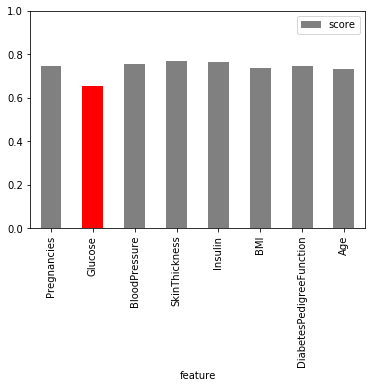

In [85]:
score_df = pd.DataFrame(result)
score_df.columns = ['feature','score']
score_df.plot.bar(x='feature',y='score',color=['gray','red','gray','gray','gray','gray','gray','gray'])
plt.ylim(0,1)
plt.show()

#### 위 그래프에 의하면 Glucose를 뺀 나머지 7개의 피쳐에 대한 정확도가 약 69%로 나오며 다른 피쳐를 뺀 정확도들을 비교하면 현저히 낮은 결과가 나왔습니다.  
#### 즉, 당뇨병에 있어서 Glucose의 영향도가 크다고 생각 할 수 있습니다. 

## feature 조합별 모델별 성능

#### 위에서의 분석 결과를 참고하여,  
#### 요인분석에서는 크게 3개의 성분으로 나누어서 SkinThickness와 관련된 요인, Glucose와 관련된 요인, Age와 관련된 요인으로 나눠졌습니다.  
#### 또, 클러스터 분석 결과로는 Glucose, Insulin, BMI와 관련된 요인으로 해서 군집화가 이루어졌습니다.  
#### 구조분석 방법 중의 하나인 그래피컬라소를 이용한 결과, 변화 값으로 BMI, Age, Pregnancies 3개의 피쳐가 크게 변화하였다는 것을 알 수 있었습니다.  
#### 결정트리를 이용한 중요도 평가로는 Glucose, BMI,  DiabetesPedigressFucntion, Age 4개의 피쳐 중요도가 높게 평가되었습니다.
#### 그리고, 서포트 백터 머신을 이용해서는 Glucose가 가장 영향도가 크다고 평가하였습니다.  
#### 이러한 결과를 종합해보면,  혈당치(Glucose) 관련 요인, 비만(BMI) 관련 요인, 연령(Age)에 따른 요인이 당뇨병에 있어서 중요한 피쳐라고 판단 되었습니다.    
#### 따라서, 3개의 피쳐만으로의 성능도를 측정하고 주성분 3개와 전체 성능도와도 비교하였습니다.  
#### 데이터를 랜덤으로 학습용과 검증용 데이터 7:3으로  설정하였습니다.  

### Min-Max scaler사용

In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_mm_scaled = scaler.transform(X)

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_mm_scaled, y, test_size=0.3, random_state=42)

In [88]:
X_train = pd.DataFrame(X_train,columns=X.columns)
X_test = pd.DataFrame(X_test,columns=X.columns)

### 모든feature을 사용한 모델들의 성능평가

#### LinearDiscriminantAnalysis 모델 성능

In [61]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train,y_train)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

cross validation score: [0.78417266 0.75539568 0.74820144 0.81294964 0.78417266]
mean score: 0.7769784172661871


LDA의 경우 CV에서 수치가 80이상으로 뛰는 경우가 있어서 robustness 한 모델이 아님을 알 수 있습니다.

#### QuadraticDiscriminantAnalysis 모델 성능

In [62]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train,y_train)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

cross validation score: [0.75539568 0.72661871 0.76258993 0.79856115 0.75539568]
mean score: 0.7597122302158275


QDA의 경우 CV에서 수치가  튀지 않기 때문에 robustness 한 모델임을 알 수 있습니다.

#### LogisticRegression 모델 성능

In [63]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train,y_train)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

cross validation score: [0.76978417 0.71942446 0.75539568 0.8057554  0.78417266]
mean score: 0.766906474820144


Logistic Reggression의 경우 CV에서 수치가 80이상으로 뛰는 경우가 있어서 robustness 한 모델이 아님을 알 수 있습니다.

#### DecisionTreeClassifier 모델성능

#### gini와 entropy성능비교

In [67]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, criterion='gini',max_depth = 3)
clf.fit(X_train,y_train)
print("train score:",clf.score(X_train, y_train))
print("test score:",clf.score(X_test, y_test))
gini = clf.feature_importances_
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

train score: 0.7880658436213992
test score: 0.7464114832535885
cross validation score: [0.70503597 0.73381295 0.74100719 0.77697842 0.73381295]
mean score: 0.7381294964028776


결정트리의 gini의 경우 CV에서 수치가 차이가 크게 나는 경우가 있어서 robustness 한 모델이 아님을 알 수 있습니다.

In [68]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth = 3)
clf.fit(X_train, y_train)
print("train score:",clf.score(X_train, y_train))
print("test score:",clf.score(X_test, y_test))
entropy = clf.feature_importances_
scores = cross_val_score(clf, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

train score: 0.7880658436213992
test score: 0.7464114832535885
cross validation score: [0.74100719 0.73381295 0.73381295 0.75539568 0.73381295]
mean score: 0.739568345323741


결정트리의 gini의 경우 CV에서 수치가 튀지 않기 때문에 robustness 한 모델임을 알 수 있습니다.

In [69]:
cart = pd.DataFrame([X.columns, gini,entropy]).T
cart.columns = ['feature','gini','entropy']
cart

,feature,gini,entropy
0,Pregnancies,0,0
1,Glucose,0.761547,0.731995
2,BloodPressure,0,0
3,SkinThickness,0,0
4,Insulin,0,0
5,BMI,0.0869776,0.162912
6,DiabetesPedigreeFunction,0.089068,0.0758209
7,Age,0.0624076,0.0292717


#### KNeighborsClassifier 모델성능

In [71]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=13)
neigh.fit(X_train, y_train)
print("train score:",neigh.score(X_train, y_train))
print("test score:",neigh.score(X_test, y_test))
scores = cross_val_score(neigh, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

train score: 0.7530864197530864
test score: 0.7655502392344498
cross validation score: [0.74820144 0.72661871 0.73381295 0.76258993 0.74100719]
mean score: 0.7424460431654676


K-nn의 경우 CV에서 수치가 튀지 않기 때문에 robustness 한 모델임을 알 수 있습니다.

#### SupportVectorMachine 모델성능

In [72]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_scaled, y)
print("train score:",clf.score(X_train, y_train))
print("test score:",clf.score(X_test, y_test))
scores = cross_val_score(clf, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

train score: 0.5164609053497943
test score: 0.49282296650717705
cross validation score: [0.75539568 0.74100719 0.74100719 0.79856115 0.79856115]
mean score: 0.7669064748201438


SVM의 경우 CV에서 수치가 차이가 크게 나는 경우가 있어서 robustness 한 모델이 아님을 알 수 있습니다.

### 주성분3개의 feature만을 사용한 모델들의 성능평가

In [73]:
#주성분분석
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
principalComponents = pca.transform(X)

In [74]:
principalDf = pd.DataFrame(data=principalComponents, columns={'com1', 'com2', 'com3'}) 
len(principalDf)

695

In [84]:
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(principalDf, y, test_size=0.3, random_state=42)

#### LinearDiscriminantAnalysis 모델성능

In [85]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train_pca,y_train_pca)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, principalDf, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

cross validation score: [0.70503597 0.72661871 0.70503597 0.77697842 0.78985507]
mean score: 0.740704827442394


LDA의 경우 CV에서 수치가 차이가 크게 나는 경우가 있어서 robustness 한 모델이 아님을 알 수 있습니다.

####  QuadraticDiscriminantAnalysis 모델성능

In [86]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train_pca,y_train_pca)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

cross validation score: [0.76258993 0.74820144 0.71942446 0.8057554  0.75362319]
mean score: 0.7579188822854759


QDA의 경우 CV에서 수치가 80이 넘는 경우가 있어서 robustness 한 모델이 아님을 알 수 있습니다.

#### LogisticRegression 모델성능

In [87]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train_pca,y_train_pca)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

cross validation score: [0.77697842 0.76258993 0.75539568 0.82014388 0.78985507]
mean score: 0.7809925972265666


Logistic Regression의 경우 CV에서 수치가 80이 넘는 경우가 있어서 robustness 한 모델이 아님을 알 수 있습니다.

#### KNeighborsClassifier 모델성능

In [88]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=13)
neigh.fit(X_train_pca, y_train_pca)
print("train score:",neigh.score(X_train_pca, y_train_pca))
print("test score:",neigh.score(X_test_pca, y_test_pca))
scores = cross_val_score(neigh, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

train score: 0.7587628865979381
test score: 0.7464114832535885
cross validation score: [0.74820144 0.73381295 0.72661871 0.8057554  0.76086957]
mean score: 0.7550516108852049


K-nn의 경우 CV에서 수치가 80이 넘는 경우가 있어서 robustness 한 모델이 아님을 알 수 있습니다.

#### DecisionTreeClassifier 모델성능

#### gini와 entropy의 성능비교

In [89]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, max_depth = 3)
clf.fit(X_train_pca,y_train_pca)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

cross validation score: [0.69064748 0.74820144 0.73381295 0.74100719 0.73913043]
mean score: 0.7305598999061619


결정트리의 gini의 경우 CV에서 수치가 70이하가 있어서 robustness 한 모델이 아님을 알 수 있습니다.

In [91]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth = 3)
clf.fit(X_train_pca, y_train_pca)
print("train score:",clf.score(X_train_pca, y_train_pca))
print("test score:",clf.score(X_test_pca, y_test_pca))
entropy = clf.feature_importances_
scores = cross_val_score(clf, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

train score: 0.7835051546391752
test score: 0.7559808612440191
cross validation score: [0.74820144 0.74820144 0.73381295 0.73381295 0.74637681]
mean score: 0.7420811177145239


결정트리의 entropy의 경우 CV에서 수치가 균등하게 이루어져 있어서 robustness 한 모델임을 알 수 있습니다.

In [92]:
cart = pd.DataFrame([X.columns, gini,entropy]).T
cart.columns = ['feature','gini','entropy']
cart

,feature,gini,entropy
0,Pregnancies,0,0.0322849
1,Glucose,0.908815,0.849261
2,BloodPressure,0.0911845,0.118454
3,SkinThickness,None,None
4,Insulin,None,None
5,BMI,None,None
6,DiabetesPedigreeFunction,None,None
7,Age,None,None


#### SupportVectorMachine 모델성능

In [95]:
from sklearn.svm import SVC

clf = SVC(gamma='auto',C=0.1)
clf.fit(X_train_pca, y_train_pca)
print("train score:",clf.score(X_train_pca, y_train_pca))
print("test score:",clf.score(X_test_pca, y_test_pca))
scores = cross_val_score(clf, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

train score: 0.6556701030927835
test score: 0.6842105263157895
cross validation score: [0.66906475 0.6618705  0.6618705  0.6618705  0.66666667]
mean score: 0.6642685851318945


SVM의 경우 CV에서 수치가 균등하게 이루어져 있어서 robustness 한 모델임을 알 수 있습니다.

### 유의미한 3개 feature(glucose, BMI, age)만을 사용하여 모델별 성능평가

In [77]:
X_train_3 = X_train[[ 'Glucose', 'BMI', 'Age']]
X_test_3 = X_test[[ 'Glucose', 'BMI', 'Age']]

#### LinearDiscriminantAnalysis 모델성능

In [78]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train_3,y_train)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train_3, y_train, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

cross validation score: [0.76530612 0.75257732 0.70103093 0.78350515 0.78350515]
mean score: 0.7571849358300021


LDA의 경우 CV에서 수치가 차이가 크게 있어서 robustness 한 모델이 아님을 알 수 있습니다.

#### QuadraticDiscriminantAnalysis 모델성능

In [79]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train_3,y_train)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train_3, y_train, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

cross validation score: [0.73469388 0.72164948 0.68041237 0.77319588 0.79381443]
mean score: 0.7407532084998948


QDA의 경우 CV에서 수치가 70이하로 떨어져 있는 경우가 있어서 robustness 한 모델이 아님을 알 수 있습니다.

####  LogisticRegression 모델성능

In [80]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train_3,y_train)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train_3,y_train, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

cross validation score: [0.76530612 0.78350515 0.69072165 0.79381443 0.75257732]
mean score: 0.7571849358300021


Logistic Regression의 경우 CV에서 수치가 70이하로 떨어져 있는 경우가 있어서 robustness 한 모델이 아님을 알 수 있습니다.

#### DecisionTreeClassifier 모델성능

#### gini와 entropy의 성능비교

In [82]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, max_depth = 3)
clf.fit(X_train_3,y_train)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train_3,y_train, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

cross validation score: [0.7755102  0.73195876 0.72164948 0.78350515 0.77319588]
mean score: 0.7571638964864296


결정트리의 gini의 경우 CV에서 수치가 균등하게 이루어져 있어서 robustness 한 모델임을 알 수 있습니다.

In [83]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth = 3)
clf.fit(X_train_3, y_train)
print("train score:",clf.score(X_train_3, y_train))
print("test score:",clf.score(X_test_3, y_test))
entropy = clf.feature_importances_
scores = cross_val_score(clf, X_train_3,y_train, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

train score: 0.7757201646090535
test score: 0.7368421052631579
cross validation score: [0.7755102  0.73195876 0.72164948 0.64948454 0.77319588]
mean score: 0.7303597727750895


결정트리의 entropy의 경우 CV에서 수치가 70 이하로 떨어져 있는 경우가 있어서 robustness 한 모델이 아님을 알 수 있습니다.

In [84]:
cart = pd.DataFrame([X.columns, gini,entropy]).T
cart.columns = ['feature','gini','entropy']
cart

,feature,gini,entropy
0,Pregnancies,0,0.76748
1,Glucose,0.761547,0.201829
2,BloodPressure,0,0.0306907
3,SkinThickness,0,None
4,Insulin,0,None
5,BMI,0.0869776,None
6,DiabetesPedigreeFunction,0.089068,None
7,Age,0.0624076,None


#### KNeighborsClassifier 모델성능

In [85]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=13)
neigh.fit(X_train_3, y_train)
print("train score:",neigh.score(X_train_3, y_train))
print("test score:",neigh.score(X_test_3, y_test))
scores = cross_val_score(neigh, X_train_3,y_train, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

train score: 0.7880658436213992
test score: 0.7703349282296651
cross validation score: [0.7755102  0.75257732 0.74226804 0.78350515 0.74226804]
mean score: 0.7592257521565327


K-nn의 경우 CV에서 수치가 균등하게 이루어져 있어서 robustness 한 모델임을 알 수 있습니다.

#### SupportVectorMachine 모델성능

In [87]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf =SVC(gamma='auto',C=0.1)
clf.fit(X_train_3, y_train)
print("train score:",clf.score(X_train_3, y_train))
print("test score:",clf.score(X_test_3, y_test))
scores = cross_val_score(clf, X_train_3, y_train, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

train score: 0.654320987654321
test score: 0.6842105263157895
cross validation score: [0.65306122 0.65979381 0.65979381 0.64948454 0.64948454]
mean score: 0.6543235851041447


SVM의 경우 CV에서 수치가 균등하게 이루어져 있어서 robustness 한 모델임을 알 수 있습니다.

#### 여러 가지 모델을 사용해서 성능도를 측정한 결과 제안한 3개의 feature만으로도 동등 이상의 높은 예측성능도를 얻을 수 있습니다.  
#### 당뇨병에 있어서 이 3개의 feature가 영향이 크기 때문에 주의할 필요가 있습니다.  

## 결과

사전에 유의미한 3개의 feature(Glucose, BMI, Age)만으로의 자가 진단을 통해 직접 방문하지 않고 당뇨병을 체크할 수 있습니다.   
Glucose 같은 경우에는 당 수치를 측정 하는 혈당 측정기를 통해 자신의 혈당수치를 체크할 수 있습니다.  
자가 진단을 통하여 질병의 조기 발견이나 상시로 확인할 수 있기 때문에 합병증 예방이 될 수 있습니다.  